In [1]:
import mxnet 
from mxnet.gluon import nn
from mxnet import gluon, image, npx
import matplotlib.pyplot as plt
import numpy
from mxnet.gluon.data.vision import transforms
import cv2
from PIL import Image
from mxnet.gluon.model_zoo import vision
import os
import pandas as pd
import numpy as np
from mxnet.gluon import nn
from mxnet import init,autograd
npx.set_np()
import sklearn 
import statsmodels
import plotly

In [2]:
import json
import plotly.graph_objects as go 
from pathlib import Path

In [3]:
from IPython import display
%matplotlib inline
npx.set_np()

In [4]:
nab = Path.cwd()/r'NAB'
data_path = nab/r'data'
labels_filepath = nab/r'labels/combined_labels.json'

In [5]:
print(nab)

e:\Data_cleaning_project\NAB


In [6]:
print(labels_filepath)

e:\Data_cleaning_project\NAB\labels\combined_labels.json


In [7]:
training_filename =r'realAWSCloudwatch/rds_cpu_utilization_cc0c53.csv'

valid_filename = r'realAWSCloudwatch/rds_cpu_utilization_e47b3b.csv'

In [8]:
print(training_filename, valid_filename)

realAWSCloudwatch/rds_cpu_utilization_cc0c53.csv realAWSCloudwatch/rds_cpu_utilization_e47b3b.csv


In [9]:
with open(labels_filepath,'r') as f:
    anomalies_timestamps = json.load(f)
    train_data_anomalies = anomalies_timestamps[training_filename]
    valid_data_anomalies = anomalies_timestamps[valid_filename]
    print(train_data_anomalies, valid_data_anomalies)



['2014-02-25 07:15:00', '2014-02-27 00:50:00'] ['2014-04-13 06:52:00', '2014-04-18 23:27:00']


In [10]:
train_pd = pd.read_csv(data_path/training_filename)
valid_pd = pd.read_csv(data_path/valid_filename)
print(train_pd.head(), valid_pd.head())

             timestamp  value
0  2014-02-14 14:30:00  6.456
1  2014-02-14 14:35:00  5.816
2  2014-02-14 14:40:00  6.268
3  2014-02-14 14:45:00  5.816
4  2014-02-14 14:50:00  5.862              timestamp   value
0  2014-04-10 00:02:00  14.012
1  2014-04-10 00:07:00  13.334
2  2014-04-10 00:12:00  15.000
3  2014-04-10 00:17:00  13.998
4  2014-04-10 00:22:00  14.332


In [11]:
print(pd.isnull(train_pd).sum())
print(pd.isnull(valid_pd).sum())
print(pd.isnull(train_data_anomalies))
print(pd.isnull(valid_data_anomalies))

timestamp    0
value        0
dtype: int64
timestamp    0
value        0
dtype: int64
[False False]
[False False]


In [12]:
def normalization(data):
    mean = data.mean(keepdims=True)
    var = ((data-mean)**2).mean(keepdims=True)
    normalized_data = (data-mean)/np.sqrt(var)
    return normalized_data
    

In [25]:
#train and validation  data 
train_value = np.array(train_pd['value'])
valid_value = np.array(valid_pd['value'])

#train = train_pd['timestamp'].copy()
#valid = valid_pd['timestamp'].copy()

train_pd['normalize value'] = pd.Series(normalization(train_value))
valid_pd['normalize value']= pd.Series(normalization(valid_value))




In [20]:
train_pd.head(), valid_pd.head()

(             timestamp  value  normalize value
 0  2014-02-14 14:30:00  6.456        -0.453498
 1  2014-02-14 14:35:00  5.816        -0.628741
 2  2014-02-14 14:40:00  6.268        -0.504976
 3  2014-02-14 14:45:00  5.816        -0.628741
 4  2014-02-14 14:50:00  5.862        -0.616145,
              timestamp   value  normalize value
 0  2014-04-10 00:02:00  14.012        -0.878378
 1  2014-04-10 00:07:00  13.334        -0.999353
 2  2014-04-10 00:12:00  15.000        -0.702091
 3  2014-04-10 00:17:00  13.998        -0.880876
 4  2014-04-10 00:22:00  14.332        -0.821281)

In [15]:
print(train_data_anomalies, valid_data_anomalies)

['2014-02-25 07:15:00', '2014-02-27 00:50:00'] ['2014-04-13 06:52:00', '2014-04-18 23:27:00']


In [37]:
train_anomalies = train_pd[train_pd['timestamp'].isin(train_data_anomalies)]

In [38]:
print(train_anomalies)

                timestamp    value  normalize value
3080  2014-02-25 07:15:00  25.1033         4.652449
3579  2014-02-27 00:50:00  19.1650         3.026441


In [39]:
valid_anomalies = valid_pd[valid_pd['timestamp'].isin(valid_data_anomalies)]

In [41]:
valid_anomalies

,timestamp,value,normalize value
946,2014-04-13 06:52:00,76.23,10.223065
2585,2014-04-18 23:27:00,25.11,1.101818


In [42]:
def use_svg_display():
    """Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('svg')


In [43]:
def set_figsize(figsize=(3.5, 2.5)):
    """Set the figure size for matplotlib."""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize


In [44]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

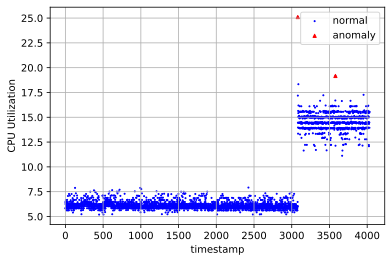

In [48]:
set_figsize((6,4))

axes = plt.gca()
axes.scatter(train_pd.iloc[:,0],train_pd.iloc[:,1],marker='.',s=5,c='blue' )
axes.scatter(train_anomalies.iloc[:,0],train_anomalies.iloc[:,1],marker='^',s=10,c='red')
set_axes(axes, xlabel='timestamp', ylabel='CPU Utilization', xlim=None, ylim=None, xscale='linear', yscale='linear', legend=['normal','anomaly'])


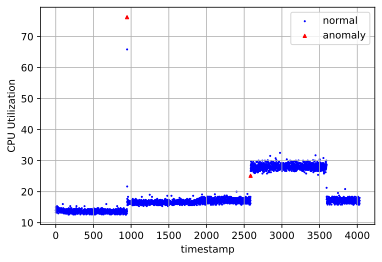

In [49]:
set_figsize((6,4))

axes = plt.gca()
axes.scatter(valid_pd.iloc[:,0],valid_pd.iloc[:,1],marker='.',s=5,c='blue' )
axes.scatter(valid_anomalies.iloc[:,0],valid_anomalies.iloc[:,1],marker='^',s=10,c='red')
set_axes(axes, xlabel='timestamp', ylabel='CPU Utilization', xlim=None, ylim=None, xscale='linear', yscale='linear', legend=['normal','anomaly'])

In [53]:
from IPython.core.debugger import set_trace
import os
import time

In [55]:
#null hypothesis testing for stationarity (p>0.05) then we rejecy null hypothesis and find differencing order
##ADF TEST
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_pd['normalize value'])
print(f'adf statistics: {result[0]}')
print(f'p-value: {result[1]}')

adf statistics: -0.6320219396956858
p-value: 0.863580991952262


p-value is high 0.86 so we have to find order of differencing to make stationary

In [56]:
#ACF: AUTO CORRELATION FUNCTION
from statsmodels.graphics.tsaplots import plot_acf


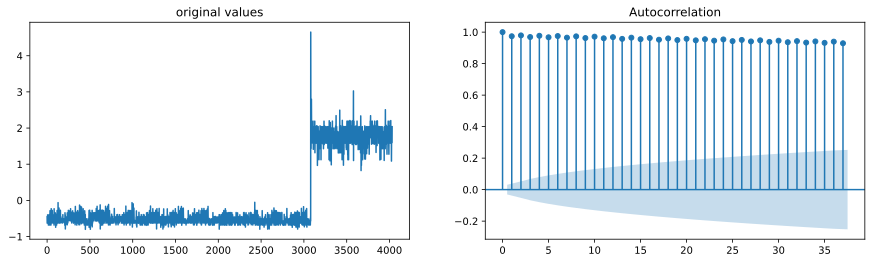

In [57]:
set_figsize((15,4))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.plot(train_pd['normalize value'])
ax1.set_title('original values')

plot_acf(train_pd['normalize value'], ax= ax2);

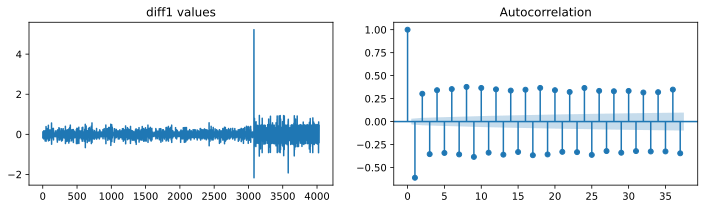

In [58]:
diff1 = train_pd['normalize value'].diff().dropna()

set_figsize((12,3))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.plot(diff1)
ax1.set_title('diff1 values')

plot_acf(diff1, ax= ax2);

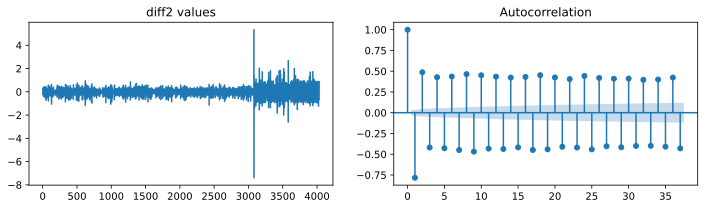

In [59]:
diff2 = diff1.diff().dropna()

set_figsize((12,3))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.plot(diff2)
ax1.set_title('diff2 values')

plot_acf(diff2, ax= ax2);            #differenciating twice has no significant change in graph 

In [113]:
# we use pmdarima package and from that use ndiffs and nsdiffs to get number of differenciation required automatically

#!pip install  pmdarima

In [60]:
from pmdarima.arima.utils import ndiffs,nsdiffs

In [61]:
d= ndiffs(train_pd['normalize value'], test='adf')
print(d)


1


In [62]:
#to find p value we can plot and manually select point where partial autocorrelation value is above normal 
from statsmodels.graphics.tsaplots import plot_pacf


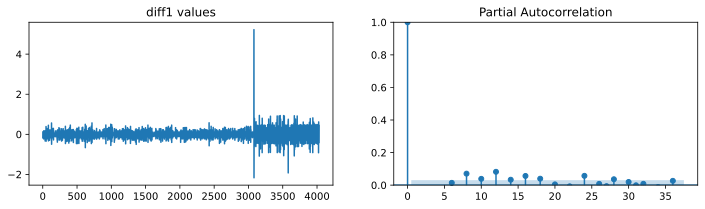

In [63]:
#since we have found d=1 is best se using diff1

set_figsize((12,3))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.plot(diff1)
ax1.set_title('diff1 values')
ax2.set_ylim(0,1)
plot_pacf(diff1, ax= ax2);            #from the below graph we can see for p=8  we have autocorr above normal so we took it as it is lower also

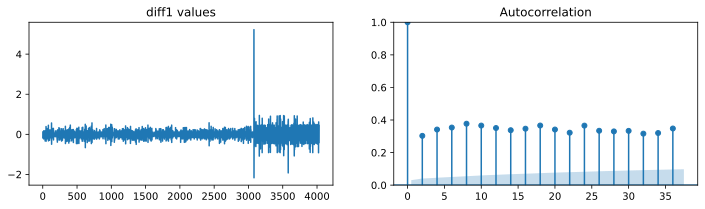

In [64]:
set_figsize((12,3))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.plot(diff1)
ax1.set_title('diff1 values')
ax2.set_ylim(0,1)
plot_acf(diff1, ax= ax2);              # we chose q=2 for our model as all are above normal and it is first after 0 

In [65]:
from statsmodels.tsa.arima.model import ARIMA

# we have found d=1, p=8, q=2 from graphs and ndiffs 
p,d,q = (8,1,2)
temp= train_pd['normalize value'].copy()
model = ARIMA(temp, order=(p,d,q))
result = model.fit()


C:\Users\hp\.conda\envs\d2l\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [66]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        normalize value   No. Observations:                 4032
Model:                 ARIMA(8, 1, 2)   Log Likelihood                1819.185
Date:                Fri, 28 May 2021   AIC                          -3616.370
Time:                        14:12:11   BIC                          -3547.051
Sample:                             0   HQIC                         -3591.808
                               - 4032                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6310      0.007    -92.067      0.000      -0.644      -0.618
ar.L2          0.4744      0.013     37.544      0.000       0.450       0.499
ar.L3          0.2397      0.012     19.574      0.000       0.216       0.264
ar.L4          0.2117      0.019     11.405      0.000       0.175       0.248
ar.L5          0.2002      0.012     17.081      0.000       0.177       0.223
ar.L6          0.1934      0.016     11.937      0.000       0.162       0.225
ar.L7          0.1692      0.012     13.887      0.000       0.145       0.193
ar.L8          0.0964      0.012      7.806      0.000       0.072       0.121
ma.L1         -0.0286      0.006     -4.732      0.000      -0.040      -0.017
ma.L2         -0.9622      0.007   -131.026      0.000      -0.977      -0.948
sigma2         0.0237   4.46e-05    531.772      0.000       0.024       0.024
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):          17998780.64
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               5.27   Skew:                             9.64
Prob(H) (two-sided):                  0.00   Kurtosis:                       329.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

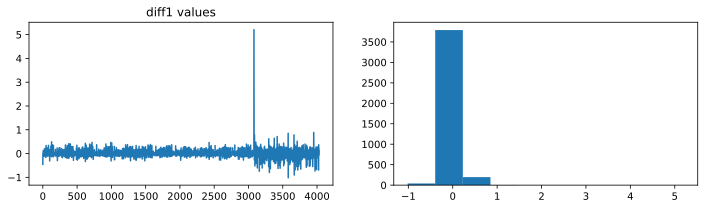

In [67]:
residuals = pd.DataFrame(result.resid)

set_figsize((12,3))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.plot(residuals)
ax1.set_title('diff1 values')
#ax2.set_ylim(0,1)
ax2.hist(residuals); 

In [68]:
type(result.predict())

pandas.core.series.Series

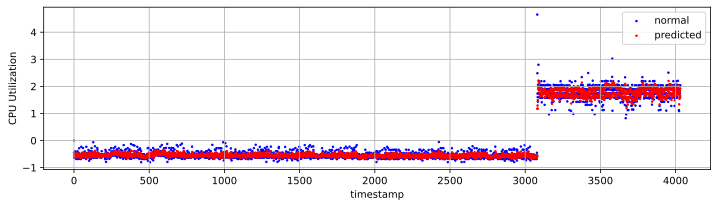

In [69]:
train_pd['predicted'] = result.predict()


axes = plt.gca()
axes.scatter(train_pd['timestamp'],train_pd['normalize value'],marker='.',s=10,c='blue' )
#axes.scatter(valid_anomalies.iloc[:,0],valid_anomalies.iloc[:,1],marker='^',s=10,c='red')
axes.scatter(train_pd['timestamp'],train_pd['predicted'],marker='.', c='r',s=10); 

set_axes(axes, xlabel='timestamp', ylabel='CPU Utilization', xlim=None, ylim=None, xscale='linear', yscale='linear', legend=['normal','predicted'])



In [70]:
# we have found d=1, p=8, q=2 from graphs and ndiffs from training data and we use same to detect anomalies in validation data
p,d,q = (8,1,2)
temp= valid_pd['normalize value'].copy()
model = ARIMA(temp, order=(p,d,q))
valid_result = model.fit()

C:\Users\hp\.conda\envs\d2l\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


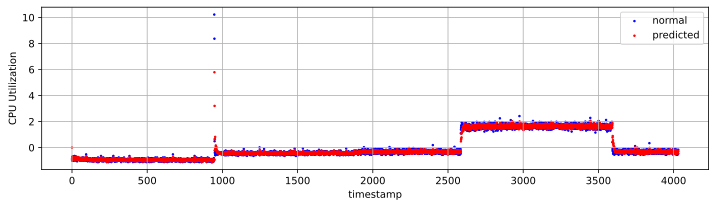

In [71]:
valid_pd['predicted'] = valid_result.predict()

axes = plt.gca()
axes.scatter(valid_pd['timestamp'],valid_pd['normalize value'],marker='.',s=10,c='blue' )
#axes.scatter(valid_anomalies.iloc[:,0],valid_anomalies.iloc[:,1],marker='^',s=10,c='red')
axes.scatter(valid_pd['timestamp'],valid_pd['predicted'],marker='.', c='r',s=10); 

set_axes(axes, xlabel='timestamp', ylabel='CPU Utilization', xlim=None, ylim=None, xscale='linear', yscale='linear', legend=['normal','predicted'])
